Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Rebecca de Feijter (10639918)

Tessa Ridderikhoff (10759697)

-----
# Exercise 1
Consider the function $f(x) = \tan(x)$. Because $\tan(x) = \sin(x) / \cos(x)$, we can approximate $f(x)$ using Taylor approximations for $\sin(x)$ and $\cos(x)$:
$$
  \sin(x) \approx x - \frac{1}{6} x^3, \quad \text{and} \quad \cos(x) \approx 1 - \frac{1}{2} x^2.
$$
This gives the approximation
$$
\hat f(x) = \frac{x - \frac{1}{6} x^3}{1 - \frac{1}{2} x^2}.
$$

## (a)
Evaluate $f(x)$ and $\hat f(x)$ at $x = 1$ and $x = 1.4$. Compute the absolute forward error and absolute backward error.

In [1]:
import math

# x = 1

# forward error
fwerr = abs(math.tan(1) - (1 - (1.0/6.0) * 1)/(1 - (1.0/2.0) * 1))

# backward error
bwerr = abs(1 - math.atan((1 - (1.0/6.0) * 1)/(1 - (1.0/2.0) * 1)))

print "Absolute forward error x = 1: ", fwerr
print "Absolute backward error x = 1: ", bwerr

# x = 1.4

# forward error
fwerr2 = abs(math.tan(1.4) - (1.4 - (1.0/6.0 * (1.4)**3))/(1 - (1.0/2.0)*(1.4)**2))

# backward error
bwerr2 = abs(1.4 - math.atan((1.4 - (1.0/6.0 * (1.4)**3))/(1 - (1.0/2.0)*(1.4)**2)))

print "Absolute forward error x = 1.4: ", fwerr2
print "Absolute backward error x = 1.4: ", bwerr2


Absolute forward error x = 1:  0.109258942012
Absolute backward error x = 1:  0.0303768265243
Absolute forward error x = 1.4:  41.3354496179
Absolute backward error x = 1.4:  0.149583102003


## (b)
Ignore $\hat f(x)$ for now. Compute the relative condition number of $f(x)$ near $x=1$ and near $x=1.4$.

In [2]:
import numpy as np

# condition number is defined by x(f'(x)/f(x) (after Taylor expansion)

# x = 1
conf = abs((1 * (1 + math.tan(1)**2)) / math.tan(1))
print "Relative condition number x = 1: ", conf

# x = 1.4
conf2 = abs((1.4 * (1 + math.tan(1.4)**2)) / math.tan(1.4))
print "Relative condition number x = 1.4: ", conf2

Relative condition number x = 1:  2.19950034059
Relative condition number x = 1.4:  8.35850461784


## (c)
Compute the relative condition number of $\hat f(x)$ near $x=1$ and near $x=1.4$.

In [16]:
# condition number is defined by x * f^'(x)/f^(x)

# x = 1
x = 1
con1 = (x * ((x**4 + 12)/(3 * (2 - x**2))**2))/((x - (1.0/6.0) * x**3)/(1 - (1.0/2.0) * x**2))

print "Relative condition number head of f x = 1: ", con1

# x = 1.4
x = 1.4
con2 = (x * ((x**4 + 12)/(3 * (2 - x**2))**2))/((x - (1.0/6.0) * x**3)/(1 - (1.0/2.0) * x**2))

print "Relative condition number head of f x = 1.4: ", con2

Relative condition number head of f x = 1:  0.6
Relative condition number head of f x = 1.4:  32.6765676568


You forgot that when a and b are integers, `a/b` is evaluated as "integer division" -- see https://stackoverflow.com/questions/183853/in-python-2-what-is-the-difference-between-and-when-used-for-division. <font color=red>This gives errors in your results. Minus 1/2 points.</font>

--------
# Exercise 2
Consider the following finite difference approximations of the second derivative of a function $f(x)$:
$$
\text{Centered FD:} \quad f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2},
$$
$$
\text{Forward FD:} \quad f''(x) \approx \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2}.
$$

## (a)
Consider the function $f(x) = \exp(-2x)$ evaluated at $x = 0.5$. Compute both finite difference approximations for the range $h \in \{1, 10^{-1}, \ldots, 10^{-16}\}$.

H =  1
Forward:  0.275043251435
Central:  2.03231001448
H =  0.1
Forward:  1.20879812886
Central:  1.47642936865
H =  0.01
Forward:  1.44242784066
Central:  1.47156681593
H =  0.001
Forward:  1.46857815975
Central:  1.47151825519
H =  0.0001
Forward:  1.47122349303
Central:  1.47151776875
H =  1e-05
Forward:  1.47148737639
Central:  1.47151790753
H =  1e-06
Forward:  1.47165613029
Central:  1.47143408569
H =  1e-07
Forward:  1.45994327738
Central:  1.47659662275
H =  1e-08
Forward:  2.77555756156
Central:  0.555111512313
H =  1e-09
Forward:  0.0
Central:  0.0
H =  1e-10
Forward:  5551.11512313
Central:  5551.11512313
H =  1e-11
Forward:  555111.512313
Central:  555111.512313
H =  1e-12
Forward:  0.0
Central:  0.0
H =  1e-13
Forward:  11102230246.3
Central:  5551115123.13
H =  1e-14
Forward:  555111512313.0
Central:  555111512313.0
H =  1e-15
Forward:  5.55111512313e+13
Central:  0.0


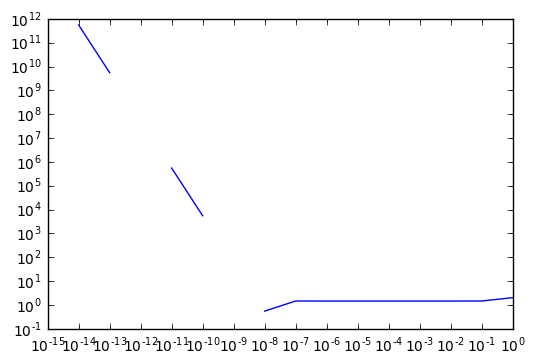

In [54]:
def forwardf(x, h):
    return (f(x + 2 * h) - 2 * f(x + h) + f(x))/(h**2)

def centralf(x, h):
    return (f(x + h) - 2 * f(x) + f(x - h))/(h**2)

h = []

for i in list(range(0, 16)):
    h.append(10**-i)
    
x = 0.5

def f(x):
    return np.exp(-2 * x)

diffs = []
    
# calculate differences
for i in h:
    print "H = ", i
    
    # forward
    forwarddiff = abs(forwardf(x, i))
    print "Forward: ", forwarddiff
    
    # central
    centraldiff = abs(centralf(x, i))
    print "Central: ", centraldiff
    diffs.append(centraldiff)
  
# # plot figure
# fig, ax = plt.subplots()
# ax.loglog(h, diffs)
# plt.show()

    

## (b)
Using the true second derivative $f''(x)$ at $x=0.5$, plot the total error of the two approximations as a function of $h$, like Figure 1.1 of the book by Heath.

$$
\text{Centered FD:} \quad f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2},
$$
$$
\text{Forward FD:} \quad f''(x) \approx \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2}.
$$

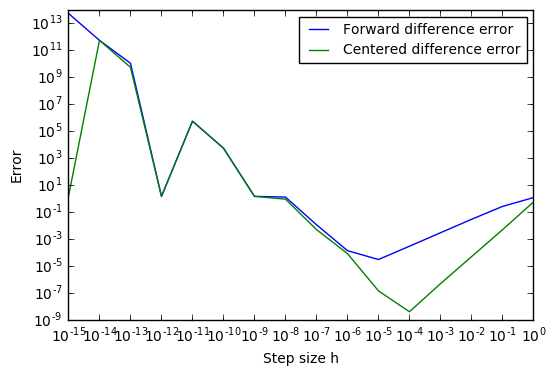

In [55]:
import matplotlib.pyplot as plt

x = 0.5

# real second derivative
def realdev(x):
    return 4 * np.exp(-2*x)

allforward = []
allcentral = []

realvalue = realdev(x)

for i in h:
    
    # calculate forward and centered approximations
    fsd = abs(forwardf(x, i))
    csd = abs(centralf(x, i))
    
    # calculate errors
    forwarderror = abs(fsd - realvalue)
    centralerror = abs(csd - realvalue)
    allforward.append(forwarderror)
    allcentral.append(centralerror)
    

# plot results
fig, ax = plt.subplots()
ax.loglog(h, allforward, label = "Forward difference error")
ax.loglog(h, allcentral, label = "Centered difference error")
ax.set_xlabel("Step size h")
ax.set_ylabel("Error")
ax.legend(fontsize = "medium")
plt.show()

## (c)
Explain, in words, what you see. How do these approximations compare?

The centered difference approximation leads to equal or smaller error values than the forward difference approximation, so approximates the real values a little better. Especially when the step size is optimal (h = 10^-4) the error of the central difference is very small. The optimal step size for the forward difference is actually a little smaller, at 10^-5. 

<font color=green>Perfect!</font>

----
# Exercise 3 (Computer exercise 1.13 from the book)
If an amount $a$ is invested at interest rate $r$ compounded $n$ times per year, then the final value $f$ at the end of one year is given by
$$
  f = a (1 + r/n)^n.
$$
This is the familiar formula for _compound interest_. When simple interest, $n=1$. Typically, compounding is done quarterly ($n=4$) or daily ($n=365$). Obviously, the more frequent the compounding, the greater the final amount. But how much difference does this frequency actually make?

## (a)
Write a program that implements the compound interest formula. Test your program using an initial investment of $a=100$, interest rate of 5 percent (so $r=0.05$), and the following values for $n$: $1, 4, 12, 365$.
Do not use Pythons `pow` function, but compute $f$ as $a (1 + r/n) \cdot (1+r/n) \cdot \ldots \cdot (1+r/n)$.

In [56]:
def compound(a, r, n):
    f = a
    for i in list(range(0, n)):
        f = f * (1 + (r/n))
    return f

print "n = 1: ", compound(100, 0.05, 1)
print "n = 4: ", compound(100, 0.05, 4)
print "n = 12: ", compound(100, 0.05, 12)
print "n = 365: ", compound(100, 0.05, 365)

n = 1:  105.0
n = 4:  105.094533691
n = 12:  105.116189788
n = 365:  105.126749647


## (b)
We can rewrite $f$ as $f = a \exp(n \log(1 + r/n))$. Using this formula, do the same as in (a).

In [18]:
def compoundexp(a, r, n):
    f = a * np.exp(n * np.log(1 + (r/n)))
    return f

print "n = 1: ", compoundexp(100, 0.05, 1)
print "n = 4: ", compoundexp(100, 0.05, 4)
print "n = 12: ", compoundexp(100, 0.05, 12)
print "n = 365: ", compoundexp(100, 0.05, 365)

print "No difference in results at first glance. But when plotting the actual difference between the outcomes of formula a and b: "

errors = []

for i in list(range(1, 365)):
    errors.append(abs(compound(100, 0.05, i) - compoundexp(100, 0.05, i)))
    
fig, ax = plt.subplots()
ax.scatter(list(range(1, 365)), errors)
ax.set_ylim(0, 3 * 10**-13)
ax.set_xlim(0, 365)
ax.set_xlabel("Size of n")
ax.set_ylabel("Absolute difference between formula a and b")
plt.show()

n = 1:  105.0
n = 4:  105.09453369140623
n = 12:  105.1161897881733
n = 365:  105.12674964674473
No difference in results at first glance. But when plotting the actual difference between the outcomes of formula a and b: 


NameError: name 'compound' is not defined

## (c)
Can you find a value of $n$ such that the formula of (a) becomes unstable? Explain this phenomenon in words.

A formula is unstable when it leads to unneccesarily wrong answers, caused by rounding. When comparing formula a and b, the difference in outcome increases as a larger n is used. This can be explained by the fact that in formula a the floats are more often multiplied by other floats, creating more and more digits, resulting in rounding errors with an increasing number of multiplications. 

<font color=red>Good analysis. I would've liked to see some higher values of $n$, perhaps 1 million or so. Minus 1/4 points </font>